# Lawlor N. et al. Human Pancreas (CEL-seq2)

## Reference:    
[Lawlor N, George J, Bolisetty M, Kursawe R et al. Single-cell transcriptomes identify human islet cell signatures and reveal cell-type-specific expression changes in type 2 diabetes. Genome Res 2017 Feb;27(2):208-222](https://www.ncbi.nlm.nih.gov/pubmed/27864352)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE86469

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


download counts

In [2]:
cts = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE86nnn/GSE86469/suppl/GSE86469_GEO.islet.single.cell.processed.data.RSEM.raw.expected.counts.csv.gz",\
                index_col=0)

In [3]:
cts.head()

10th_C10_S104  10th_C11_S96  10th_C13_S61  10th_C14_S53  \
ENSG00000229483           0.00          0.00          0.00          0.00   
ENSG00000232849           0.00          0.00          0.00          0.00   
ENSG00000229558           0.00          0.00          0.00          0.00   
ENSG00000232977           0.00          0.00          1.64          1.64   
ENSG00000227893          22.02          2.04          6.92          5.64   

                 10th_C16_S105  10th_C17_S97  10th_C19_S62  10th_C1_S59  \
ENSG00000229483           0.00          0.00          0.00         0.00   
ENSG00000232849           0.00          0.00          0.00         0.00   
ENSG00000229558           0.00          0.00          0.00         0.00   
ENSG00000232977           0.00          0.88          0.00         1.70   
ENSG00000227893           4.47          0.00         21.44         2.15   

                 10th_C20_S54  10th_C23_S98  ...  9th-C87_S66  9th-C88_S73  \
ENSG00000229483          0.00          0.00  ...         0.00         0.00   
ENSG00000232849          0.00          0.00  ...         0.00         0.00   
ENSG00000229558          0.00          0.00  ...         0.00         0.00   
ENSG00000232977          2.49          2.98  ...         1.12         0.00   
ENSG00000227893          0.33         13.04  ...         3.76         1.03   

                 9th-C89_S72  9th-C8_S14  9th-C91_S78  9th-C92_S77  \
ENSG00000229483         0.00        0.00         0.00         0.00   
ENSG00000232849         0.00        0.00         0.00         0.00   
ENSG00000229558         0.00        0.00         0.00         0.00   
ENSG00000232977         4.12        5.10         0.00         1.16   
ENSG00000227893         6.10        2.59         6.29         1.98   

                 9th-C93_S76  9th-C94_S83  9th-C96_S81  9th-C9_S13  
ENSG00000229483         0.00         0.00         0.00        0.00  
ENSG00000232849         0.00         0.00         0.00        0.00  
ENSG00000229558         0.00         0.00         0.00        0.00  
ENSG00000232977         0.00         0.00         2.12        5.21  
ENSG00000227893        10.06         5.64        18.02        5.96  

[5 rows x 638 columns]

In [4]:
cts.shape

(26616, 638)

In [5]:
obs = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE86nnn/GSE86469/matrix/GSE86469_series_matrix.txt.gz",\
                  sep='\t', index_col=0, skiprows=39).T

In [6]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.values.T))
ad.obs_names = cts.columns
ad.var_names = cts.index
ad = ad[ad.obs_names.isin(obs.index),:]
# ad.obs = obs.loc[ad.obs_names]
ad.obs['cell'] = obs.loc[ad.obs_names].iloc[:,8]

Trying to set attribute `.obs` of view, making a copy.


In [7]:
ad.raw = sc.pp.log1p(ad,copy=True)

In [8]:
ad.shape

(638, 26616)

In [5]:
import mygene
mg = mygene.MyGeneInfo()
x = mg.querymany(ad.var_names, scopes='ensembl.gene')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-26616...done.
Finished.
2 input query terms found dup hits:
	[('ENSG00000249981', 2), ('ENSG00000229425', 2)]
1351 input query terms found no hit:
	['ENSG00000243300', 'ENSG00000235822', 'ENSG00000215405', 'ENSG00000268343', 'ENSG00000230058', 'ENS
Pass

In [23]:
var = []
qq = []
for i in x:
    if 'symbol' in i.keys():
        var.append(i['symbol'])
    else:
        var.append(i['query'])
    qq.append(i['query'])

In [24]:
dd = dict(zip(qq,var))

In [25]:
ad.var['ENS'] = ad.var_names

In [26]:
ad.var_names = ad.var_names.map(dd)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [27]:
ad.var_names_make_unique()

In [29]:
ad.write("../write/Lawlor2017Pancreas.h5")

In [2]:
ad = sc.read("../write/Lawlor2017Pancreas.h5")

In [3]:
ad.X

<638x26616 sparse matrix of type '<class 'numpy.float32'>'
	with 5307880 stored elements in Compressed Sparse Row format>

In [4]:
ad.raw.X

<638x26616 sparse matrix of type '<class 'numpy.float32'>'
	with 5307880 stored elements in Compressed Sparse Row format>

In [10]:
ls -lh ../write/Lawlor2017Pancreas.h5

-rw-r--r--  1 zmiao  384566875    84M  8 Oct 15:28 ../write/Lawlor2017Pancreas.h5


In [11]:
sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_genes(ad, min_cells=3)

In [12]:
ad = ad[~ad.obs['cell'].isin(['nan','unclear']),:]

In [13]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e4)

Trying to set attribute `.obs` of view, making a copy.


In [14]:
sc.pp.log1p(ad)
# sc_pp_regress_out(ad,keys=['n_counts','n_genes','individual'])
# sc.pp.scale(ad, max_value=10)
sc.tl.pca(ad)

In [15]:
sc.tl.tsne(ad, n_pcs=50)
sc.pp.neighbors(ad, n_pcs=50)
sc.tl.umap(ad)
sc.tl.louvain(ad, resolution=0.5)

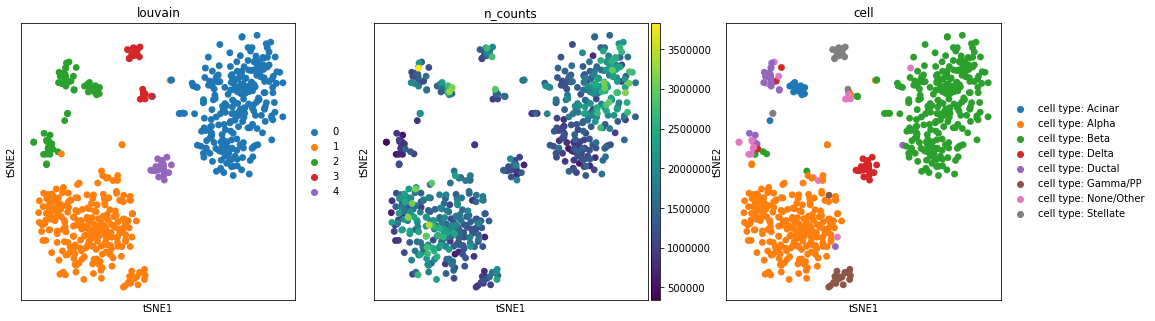

In [16]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain','n_counts','cell',])

In [17]:
ad.write("../write/Lawlor2017Pancreas_reg.h5")

# End